In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('analytics.csv', index_col=0)
df

,Order Date,Class,Region,Sub-Category,Sales
ID,,,,,
646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
909,30/12/2018,Стандарт,Владивосток,Binders,10612
1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...
1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
741,04/01/2015,Стандарт,Урал,Storage,"20415,81"


# Задание 1


## а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?


In [39]:
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)

In [41]:
category_sales = df.groupby('Sub-Category')['Sales'].sum()
sorted_category_sales = category_sales.sort_values(ascending=False)
sorted_category_sales

,Sales
Sub-Category,
Binders,3.391197e+07
Paper,3.069077e+07
Furnishings,2.156507e+07
Phones,2.034327e+07
Storage,1.889280e+07
Art,1.783246e+07
Accessories,1.727495e+07
Chairs,1.412568e+07
Appliances,1.036418e+07


## Ответ - Blinders, Paper, Furnishings, Phones

## б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [43]:
max_date = df['Order Date'].max()

In [44]:
two_years_ago = max_date - pd.DateOffset(years=2)

In [45]:
df_last_two_years = df[df['Order Date'] >= two_years_ago]

category_sales_last_2_years = df_last_two_years.groupby('Sub-Category')['Sales'].sum()
res = category_sales_last_2_years.sort_values(ascending=False)

In [46]:
res

,Sales
Sub-Category,
Binders,2.047156e+07
Paper,1.913968e+07
Furnishings,1.261281e+07
Phones,1.203552e+07
Storage,1.133849e+07
Accessories,1.025310e+07
Art,1.025160e+07
Chairs,8.134456e+06
Appliances,6.088008e+06


## Ответ - Blinders, Paper, Furnishings, Phones

In [47]:
year_ago = max_date - pd.DateOffset(years=1)
df_last_year = df[df['Order Date'] >= year_ago]

category_sales_last_year = df_last_year.groupby('Sub-Category')['Sales'].sum()
res = category_sales_last_year.sort_values(ascending=False)
res

,Sales
Sub-Category,
Binders,1.151643e+07
Paper,1.068176e+07
Furnishings,7.317576e+06
Phones,6.771745e+06
Storage,6.324807e+06
Art,6.203634e+06
Accessories,5.943291e+06
Chairs,4.388887e+06
Appliances,3.486188e+06


## Ответ - Blinders, Paper, Furnishings, Phones

## Вывод: за все три временных промежутка лидирующие места по продажам занимают подгруппы Blinders, Paper, Furnishings, Phones. За все время подгруппы примерно придерживались тех же мест, за исключением Art и Accessories в проверке за два года, Bookcases и Envelopes в проверке за последний год. Также Supplies принимал позицию выше по отношению к Fasteners за все время, но в проверке за последние два года и последний год Fasteners находится выше.

# Задание 2

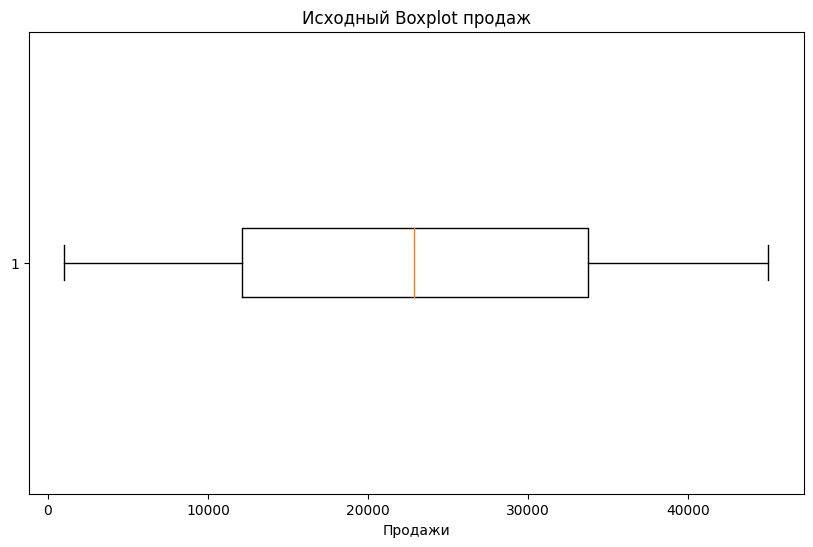

In [70]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'], vert = False)
plt.title("Исходный Boxplot продаж")
plt.xlabel("Продажи")
plt.show()

In [117]:
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
lower_bound = mean_sales - 1.5*std_sales
upper_bound = mean_sales + 1.5*std_sales

filtered_df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

In [118]:
std_sales

12601.999815243944

## отклонение в 3 сигмы

<ipython-input-123-36b75ec9bf73>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'], shade=True)


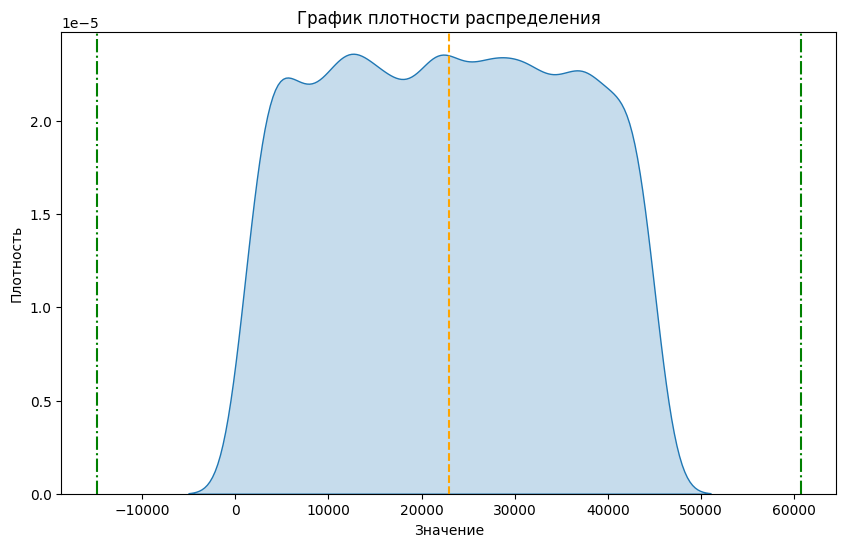

In [123]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sales'], shade=True)
plt.axvline(mean_sales, color='orange', linestyle='--')
plt.axvline(mean_sales - 3*std_sales, color='green', linestyle='-.')
plt.axvline(mean_sales + 3*std_sales, color='green', linestyle='-.')
plt.title('График плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()

## отклонение в 1.5 сигмы

<ipython-input-124-8383eb29f864>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'], shade=True)


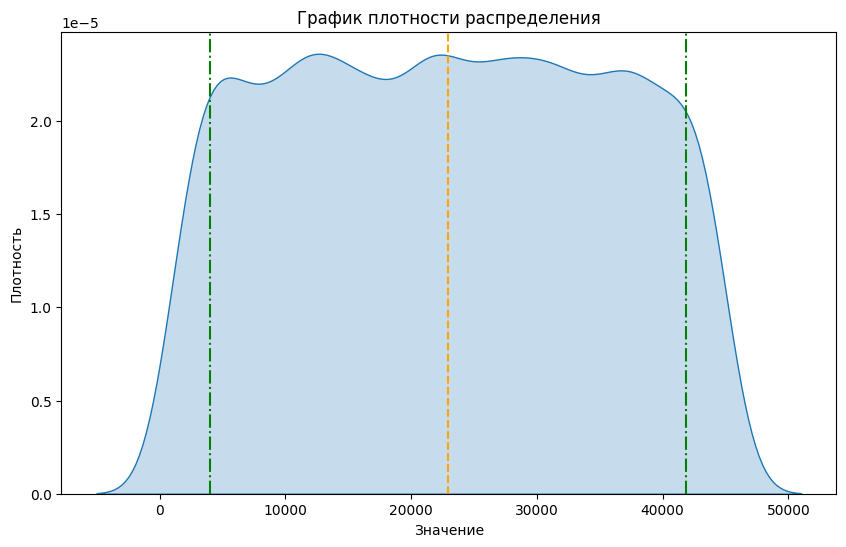

In [124]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Sales'], shade=True)
plt.axvline(mean_sales, color='orange', linestyle='--')
plt.axvline(mean_sales - 1.5*std_sales, color='green', linestyle='-.')
plt.axvline(mean_sales + 1.5*std_sales, color='green', linestyle='-.')
plt.title('График плотности распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.show()

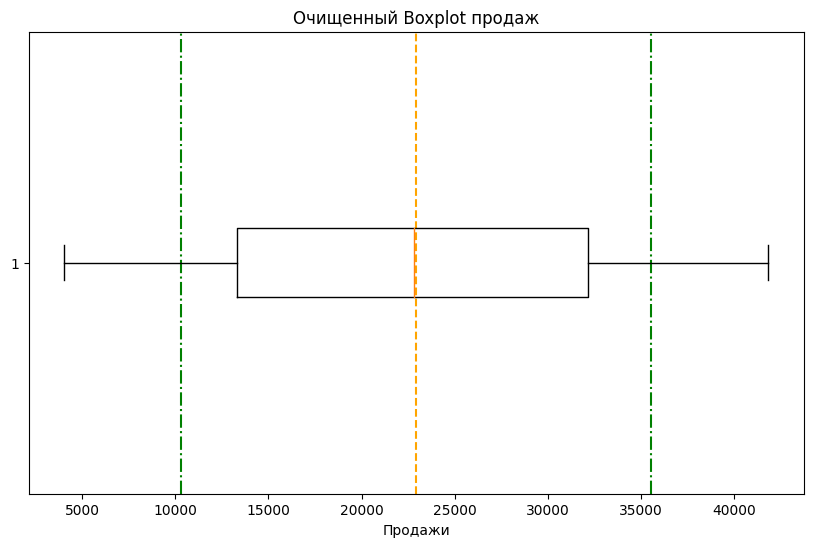

In [129]:
plt.figure(figsize=(10, 6))

plt.axvline(mean_sales, color='orange', linestyle='--')
plt.axvline(mean_sales - std_sales, color='green', linestyle='-.')
plt.axvline(mean_sales + std_sales, color='green', linestyle='-.')


plt.boxplot(filtered_df['Sales'],vert=False)
plt.title("Очищенный Boxplot продаж")
plt.xlabel("Продажи")
plt.show()

# Задание 3


In [142]:
df['Sale_group'] = pd.qcut(df['Sales'], q=3, labels=['Низкие продажи', 'Средние продажи', 'Высокие продажи'])

In [146]:
grouped_df = df.groupby(['Region', 'Sale_group']).agg({
    'Sales': ['sum', 'mean', 'count']
}).reset_index()
grouped_df.columns = ['Region', 'Sale_group', 'Total_Sales', 'Average_Sales', 'Number_of_Sales']

<ipython-input-146-1ebc18fd2345>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Region', 'Sale_group']).agg({


In [147]:
grouped_df

,Region,Sale_group,Total_Sales,Average_Sales,Number_of_Sales
0,Владивосток,Низкие продажи,7.830757e+06,8286.515222,945
1,Владивосток,Средние продажи,2.030969e+07,22974.767613,884
2,Владивосток,Высокие продажи,3.581224e+07,37460.497312,956
3,Калиниград,Низкие продажи,8.873517e+06,8548.667623,1038
4,Калиниград,Средние продажи,2.515241e+07,23012.267795,1093
5,Калиниград,Высокие продажи,3.790437e+07,37566.277532,1009
6,Москва,Низкие продажи,4.256534e+06,8217.246938,518
7,Москва,Средние продажи,1.225589e+07,22865.475168,536
8,Москва,Высокие продажи,2.037922e+07,37461.806820,544
9,Урал,Низкие продажи,6.419256e+06,8380.229930,766


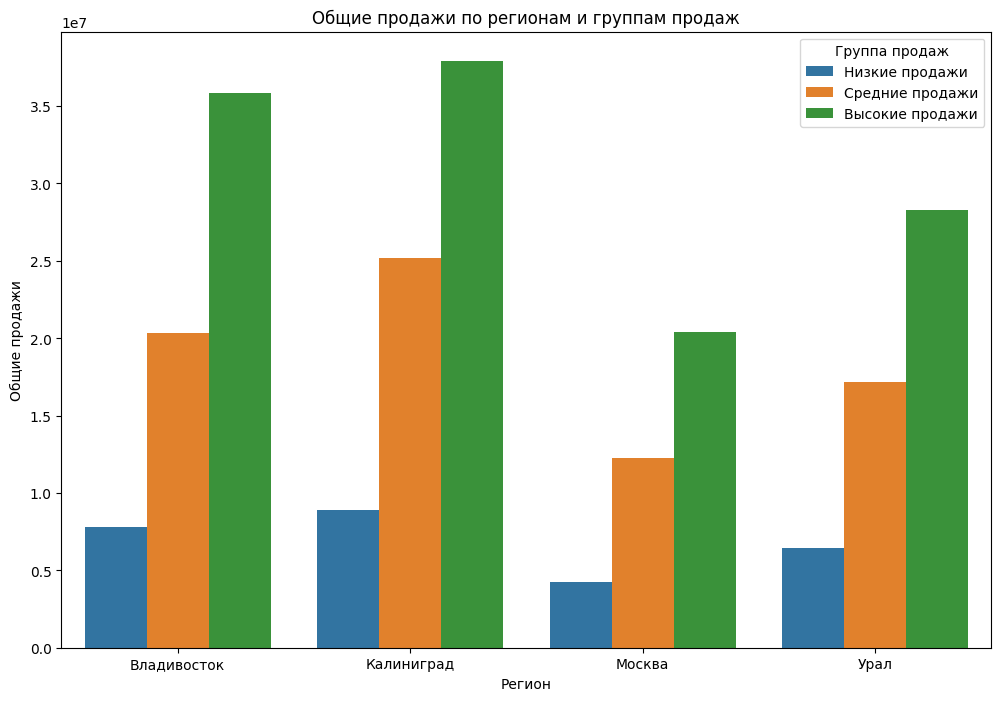

In [152]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Total_Sales', hue='Sale_group', data=grouped_df)
plt.title('Общие продажи по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Общие продажи')
plt.legend(title='Группа продаж')
plt.show()

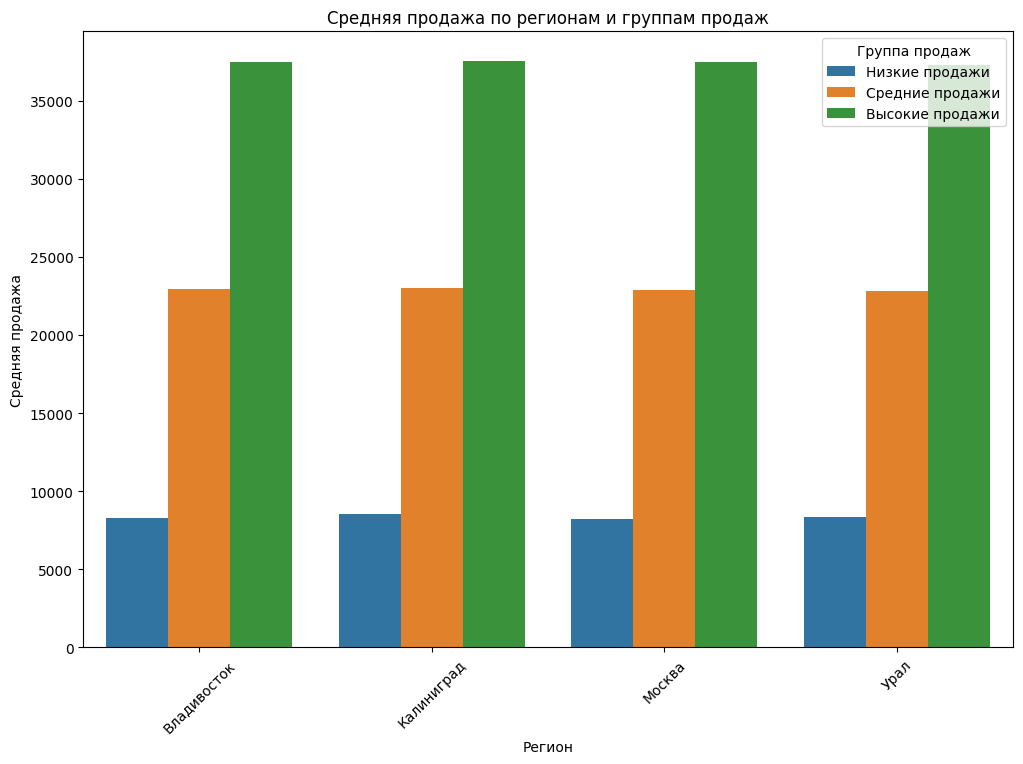

In [149]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Average_Sales', hue='Sale_group', data=grouped_df)
plt.title('Средняя продажа по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Средняя продажа')
plt.xticks(rotation=45)
plt.legend(title='Группа продаж')
plt.show()

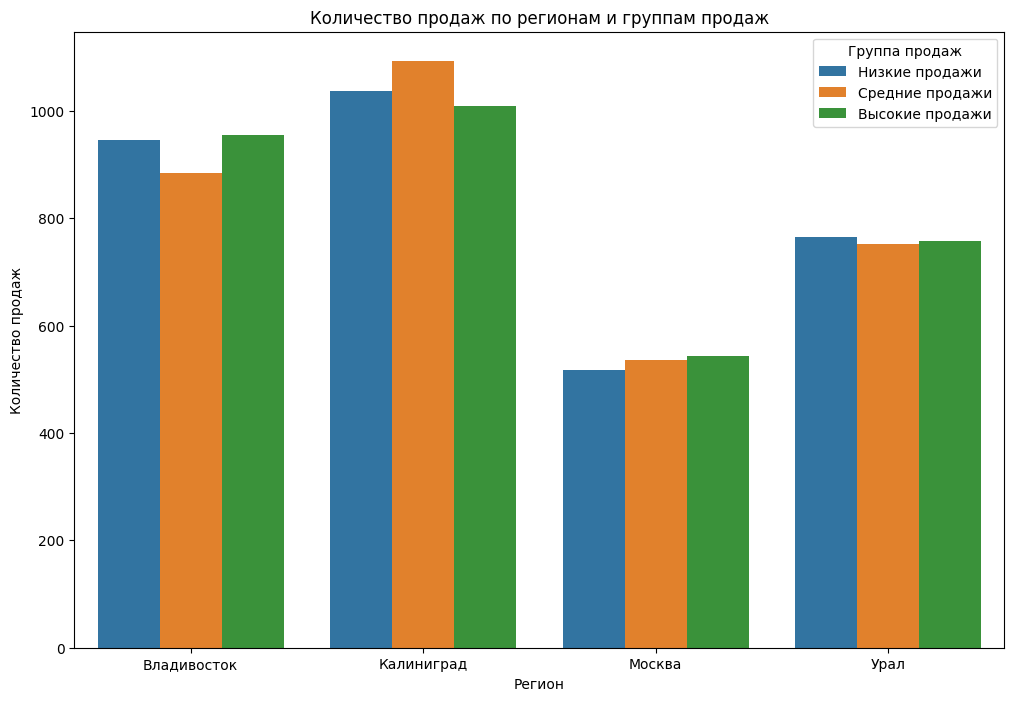

In [151]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Number_of_Sales', hue='Sale_group', data=grouped_df)
plt.title('Количество продаж по регионам и группам продаж')
plt.xlabel('Регион')
plt.ylabel('Количество продаж')
plt.legend(title='Группа продаж')
plt.show()

In [158]:
most_profitable_group = grouped_df.groupby('Sale_group')['Total_Sales'].sum().idxmax()
most_sell_group = grouped_df.groupby('Sale_group')['Total_Sales'].count().idxmax()

<ipython-input-158-e3713b4731bd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_profitable_group = grouped_df.groupby('Sale_group')['Total_Sales'].sum().idxmax()
<ipython-input-158-e3713b4731bd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_sell_group = grouped_df.groupby('Sale_group')['Total_Sales'].count().idxmax()


In [159]:
most_profitable_data = grouped_df[grouped_df['Sale_group'] == most_profitable_group]
most_sell_data = grouped_df[grouped_df['Sale_group'] == most_sell_group]



In [160]:
most_sell_data

,Region,Sale_group,Total_Sales,Average_Sales,Number_of_Sales
0,Владивосток,Низкие продажи,7830756.885,8286.515222,945
3,Калиниград,Низкие продажи,8873516.993,8548.667623,1038
6,Москва,Низкие продажи,4256533.914,8217.246938,518
9,Урал,Низкие продажи,6419256.126,8380.229930,766


In [161]:
most_profitable_data

,Region,Sale_group,Total_Sales,Average_Sales,Number_of_Sales
2,Владивосток,Высокие продажи,35812235.43,37460.497312,956
5,Калиниград,Высокие продажи,37904374.03,37566.277532,1009
8,Москва,Высокие продажи,20379222.91,37461.806820,544
11,Урал,Высокие продажи,28258324.20,37280.111082,758


## Больше всего сделок произошло по низким продажам, а самая прибыльная группа - высокие продажи